##Import Library

In [ ]:
!pip install google-play-scraper

# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Scraping Dataset

In [23]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort

# Mengambil semua ulasan dari aplikasi BSI Mobile dengan ID 'com.bsm.activity2' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.bsm.activity2',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=1000             # Jumlah maksimum ulasan yang ingin diambil
)

In [24]:
# Menyimpan ulasan dalam file CSV
import csv

with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

##Loading Dataset

In [25]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [26]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,22d459ee-3efd-417f-94b0-5ebd940ef5c2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,assalamualaikum... ya sya lebih nyaman menggun...,5,7,6.26.0,2025-04-13 10:57:19,"Assalamualaikum Bapak/Ibu, mohon maaf atas ket...",2025-04-13 13:59:18,6.26.0
1,3d4e5680-5aa9-487a-8113-1d8c76a1891b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Lebih bagus pakai aplikasi BSI Mobile, aktivas...",5,3,6.26.0,2025-04-14 05:22:18,Assalamualaikum Ibu Najwa. Terima kasih atas A...,2025-04-14 08:49:47,6.26.0
2,713888ec-e68a-49bd-9646-1830a19b7cd7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Lebih bagus aplikasi BSI Mobile, privasi terja...",5,292,6.25.0,2025-02-10 21:23:23,Terima kasih atas kepercayaan Kakak terhadap B...,2025-02-11 11:58:43,6.25.0
3,912452fd-3f42-457d-af9b-5136f95850bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Proses instalasinya sangat merepotkan karena s...,1,116,6.25.0,2025-01-25 13:36:27,"Assalamualaikum Ibu Tanti, mohon maaf atas ken...",2025-01-26 08:21:28,6.25.0
4,4e84d783-ab74-4df3-b76b-5c84f0708a4c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Demi Allah makin lama bikin emosi semenjak har...,1,68,6.25.0,2025-01-22 23:45:38,"Assalamualaikum Bapak Fachri, mohon maaf atas ...",2025-01-23 07:32:53,6.25.0


In [27]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95351 entries, 0 to 95350
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              95351 non-null  object        
 1   userName              95351 non-null  object        
 2   userImage             95351 non-null  object        
 3   content               95350 non-null  object        
 4   score                 95351 non-null  int64         
 5   thumbsUpCount         95351 non-null  int64         
 6   reviewCreatedVersion  79705 non-null  object        
 7   at                    95351 non-null  datetime64[ns]
 8   replyContent          78832 non-null  object        
 9   repliedAt             78832 non-null  datetime64[ns]
 10  appVersion            79705 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 8.0+ MB


In [28]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [29]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [30]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65883 entries, 0 to 92050
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              65883 non-null  object        
 1   userName              65883 non-null  object        
 2   userImage             65883 non-null  object        
 3   content               65883 non-null  object        
 4   score                 65883 non-null  int64         
 5   thumbsUpCount         65883 non-null  int64         
 6   reviewCreatedVersion  65883 non-null  object        
 7   at                    65883 non-null  datetime64[ns]
 8   replyContent          65883 non-null  object        
 9   repliedAt             65883 non-null  datetime64[ns]
 10  appVersion            65883 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 6.0+ MB


##Preprocessing Text

In [39]:
import re
import string
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [40]:
slangwords = {"sya": "saya", "tw": "tahu", "jdi": "jadi", "smua": "semua", "apk": "aplikasi", "dlu": "dulu", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [41]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [42]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,22d459ee-3efd-417f-94b0-5ebd940ef5c2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,assalamualaikum... ya sya lebih nyaman menggun...,5,7,6.26.0,2025-04-13 10:57:19,"Assalamualaikum Bapak/Ibu, mohon maaf atas ket...",2025-04-13 13:59:18,6.26.0,assalamualaikum ya sya lebih nyaman menggunaka...,assalamualaikum ya sya lebih nyaman menggunaka...,assalamualaikum ya saya lebih nyaman menggunak...,"[assalamualaikum, ya, saya, lebih, nyaman, men...","[assalamualaikum, nyaman, bsi, mobile, transak...",assalamualaikum nyaman bsi mobile transaksi pe...
1,3d4e5680-5aa9-487a-8113-1d8c76a1891b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Lebih bagus pakai aplikasi BSI Mobile, aktivas...",5,3,6.26.0,2025-04-14 05:22:18,Assalamualaikum Ibu Najwa. Terima kasih atas A...,2025-04-14 08:49:47,6.26.0,Lebih bagus pakai aplikasi BSI Mobile aktivasi...,lebih bagus pakai aplikasi bsi mobile aktivasi...,lebih bagus pakai aplikasi bsi mobile aktivasi...,"[lebih, bagus, pakai, aplikasi, bsi, mobile, a...","[bagus, pakai, aplikasi, bsi, mobile, aktivasi...",bagus pakai aplikasi bsi mobile aktivasi biyon...
2,713888ec-e68a-49bd-9646-1830a19b7cd7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Lebih bagus aplikasi BSI Mobile, privasi terja...",5,292,6.25.0,2025-02-10 21:23:23,Terima kasih atas kepercayaan Kakak terhadap B...,2025-02-11 11:58:43,6.25.0,Lebih bagus aplikasi BSI Mobile privasi terjag...,lebih bagus aplikasi bsi mobile privasi terjag...,lebih bagus aplikasi bsi mobile privasi terjag...,"[lebih, bagus, aplikasi, bsi, mobile, privasi,...","[bagus, aplikasi, bsi, mobile, privasi, terjag...",bagus aplikasi bsi mobile privasi terjaga pemb...
3,912452fd-3f42-457d-af9b-5136f95850bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Proses instalasinya sangat merepotkan karena s...,1,116,6.25.0,2025-01-25 13:36:27,"Assalamualaikum Ibu Tanti, mohon maaf atas ken...",2025-01-26 08:21:28,6.25.0,Proses instalasinya sangat merepotkan karena s...,proses instalasinya sangat merepotkan karena s...,proses instalasinya sangat merepotkan karena s...,"[proses, instalasinya, sangat, merepotkan, kar...","[proses, instalasinya, merepotkan, muncul, not...",proses instalasinya merepotkan muncul notifika...
4,4e84d783-ab74-4df3-b76b-5c84f0708a4c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Demi Allah makin lama bikin emosi semenjak har...,1,68,6.25.0,2025-01-22 23:45:38,"Assalamualaikum Bapak Fachri, mohon maaf atas ...",2025-01-23 07:32:53,6.25.0,Demi Allah makin lama bikin emosi semenjak har...,demi allah makin lama bikin emosi semenjak har...,demi allah makin lama bikin emosi semenjak har...,"[demi, allah, makin, lama, bikin, emosi, semen...","[allah, bikin, emosi, semenjak, pindah, byond,...",allah bikin emosi semenjak pindah byond ribet ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92001,108ba5e9-26dc-4ec8-b61f-4b0bedc85eb3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ok bingit,5,0,5.2.33,2019-06-02 15:47:05,"Terima kasih atas review yang diberikan, dan t...",2019-06-03 01:33:45,5.2.33,ok bingit,ok bingit,ok bingit,"[ok, bingit]","[ok, bingit]",ok bingit
92003,5a9cfa1a-3562-4851-9223-a2a7ae134fa4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Makin dan keren,5,0,5.2.33,2018-08-07 01:16:55,Terima kasih atas review yang sudah Bapak/Ibu ...,2019-02-13 02:45:24,5.2.33,Makin dan keren,makin dan keren,makin dan keren,"[makin, dan, keren]",[keren],keren
92004,8c149032-a839-4e1b-9286-e0cf762fb056,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mempermudah bgt,5,0,5.2.33,2018-08-03 23:20:25,Terima kasih atas review yang sudah Bapak/Ibu ...,2019-02-13 02:50:06,5.2.33,Mempermudah bgt,mempe

##Pelabelan

In [43]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [44]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

polarity
positive    42878
negative    23005
Name: count, dtype: int64


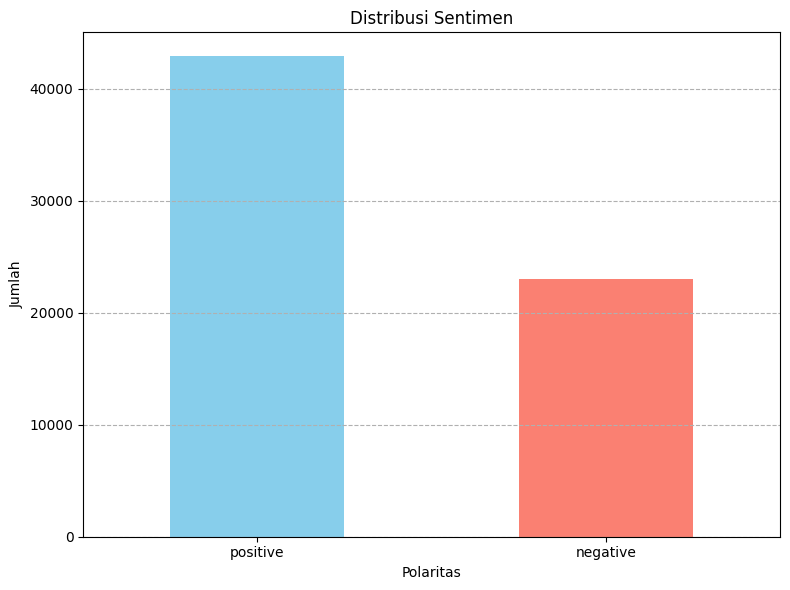

In [49]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

# Menghitung jumlah sentimen
polarity_counts = clean_df['polarity'].value_counts()

# Membuat diagram batang
plt.figure(figsize=(8, 6))
polarity_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen']) # Anda bisa mengganti warna sesuai keinginan
plt.title('Distribusi Sentimen')
plt.xlabel('Polaritas')
plt.ylabel('Jumlah')
plt.xticks(rotation=0) # Agar label sumbu x tidak miring
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

##Eksplorasi Label

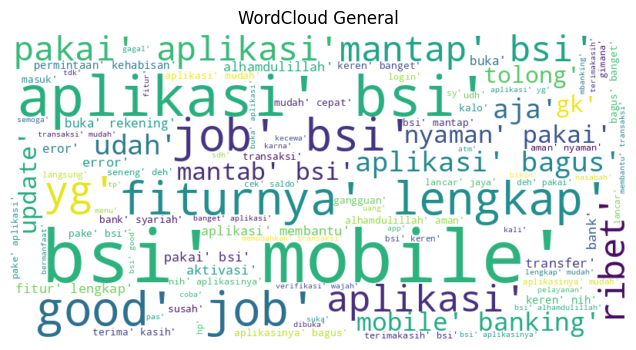

In [53]:
from wordcloud import STOPWORDS
# 1. WordCloud secara General
all_text = ' '.join(clean_df['text_stopword'].astype(str))
wordcloud_general = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(all_text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_general, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud General')
plt.show()

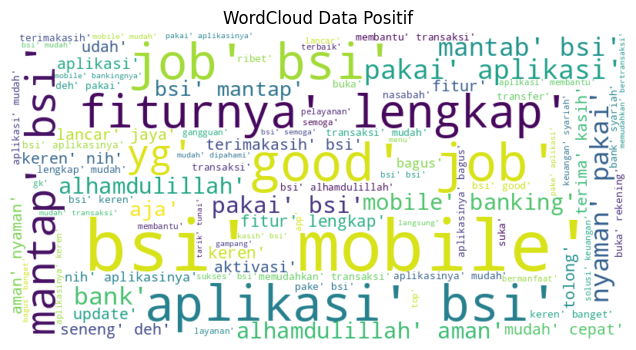

In [62]:
# 2. WordCloud untuk Positive Data
positive_text = ' '.join(clean_df[clean_df['polarity'] == 'positive']['text_stopword'].astype(str))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(positive_text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud Data Positif')
plt.show()

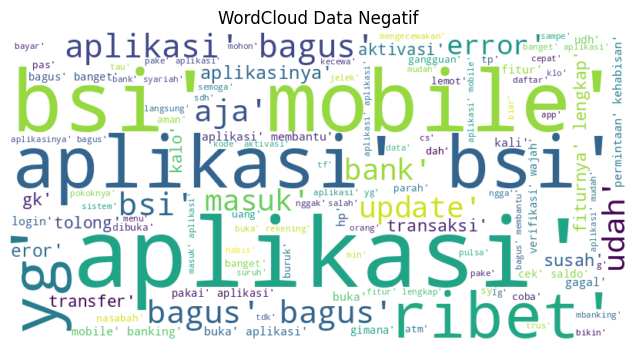

In [66]:
# 3. WordCloud untuk Negative Data
negative_text = ' '.join(clean_df[clean_df['polarity'] == 'negative']['text_stopword'].astype(str))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(negative_text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud Data Negatif')
plt.show()

##Data Splitting dan Ekstraksi Fitur dengan TF-IDF

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

##Modeling

###Naive Bayes (NB)

In [70]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8273631085644898
Naive Bayes - accuracy_test: 0.8240874250588146


###Random Forest (RF)

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9816908890828369
Random Forest - accuracy_test: 0.8941337178416938


###Logistic Regression (LR)

In [72]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9162144727355519
Logistic Regression - accuracy_test: 0.9169765500493283


###Decision Tree (DT)

In [73]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9816908890828369
Decision Tree - accuracy_test: 0.860438643090233


##Hasil Sentimen:

In [74]:
print(clean_df.head())

                               reviewId         userName  \
0  22d459ee-3efd-417f-94b0-5ebd940ef5c2  Pengguna Google   
1  3d4e5680-5aa9-487a-8113-1d8c76a1891b  Pengguna Google   
2  713888ec-e68a-49bd-9646-1830a19b7cd7  Pengguna Google   
3  912452fd-3f42-457d-af9b-5136f95850bf  Pengguna Google   
4  4e84d783-ab74-4df3-b76b-5c84f0708a4c  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  assalamualaikum... ya sya lebih nyaman menggun...      5              7   
1  Lebih bagus pakai aplikasi BSI Mobile, aktivas...      5              3   
2  Lebih bagus aplikasi BSI Mobile, privasi terja...      5         

In [75]:
# Mengakses kolom polarity_score
polarity_scores = clean_df['polarity_score']
print("Skor Polaritas:\n", polarity_scores.head())

# Mengakses kolom polarity
polarities = clean_df['polarity']
print("\nKategori Polaritas:\n", polarities.head())

Skor Polaritas:
 0     2
1   -16
2    -5
3     0
4    -4
Name: polarity_score, dtype: int64

Kategori Polaritas:
 0    positive
1    negative
2    negative
3    positive
4    negative
Name: polarity, dtype: object


In [76]:
print(clean_df['polarity_score'].describe())

count    65883.000000
mean         1.009578
std          6.522822
min        -51.000000
25%         -2.000000
50%          0.000000
75%          5.000000
max         48.000000
Name: polarity_score, dtype: float64


In [77]:
print(clean_df['polarity'].value_counts())

polarity
positive    42878
negative    23005
Name: count, dtype: int64


In [78]:
# Mengambil semua data dengan sentimen positif
positive_data = clean_df[clean_df['polarity'] == 'positif']
print("\nData dengan Sentimen Positif (beberapa baris):\n", positive_data.head())

# Mengambil semua data dengan sentimen negatif
negative_data = clean_df[clean_df['polarity'] == 'negatif']
print("\nData dengan Sentimen Negatif (beberapa baris):\n", negative_data.head())


Data dengan Sentimen Positif (beberapa baris):
 Empty DataFrame
Columns: [reviewId, userName, userImage, content, score, thumbsUpCount, reviewCreatedVersion, at, replyContent, repliedAt, appVersion, text_clean, text_casefoldingText, text_slangwords, text_tokenizingText, text_stopword, text_akhir, polarity_score, polarity]
Index: []

Data dengan Sentimen Negatif (beberapa baris):
 Empty DataFrame
Columns: [reviewId, userName, userImage, content, score, thumbsUpCount, reviewCreatedVersion, at, replyContent, repliedAt, appVersion, text_clean, text_casefoldingText, text_slangwords, text_tokenizingText, text_stopword, text_akhir, polarity_score, polarity]
Index: []


In [79]:
clean_df.to_csv('hasil_analisis_sentimen.csv', index=False)

In [2]:
!pip freeze > requirements.txt